# Exploring Convolutional Layers Through Data and Experiments


## SetUp

In [25]:
%pip install numpy matplotlib tensorflow

Note: you may need to restart the kernel to use updated packages.


In [26]:
from tensorflow.keras.datasets import cifar100
import numpy as np
import matplotlib.pyplot as plt

## Dataset Definition

In [27]:

# Cargar dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

print(x_train.shape)  # (50000, 32, 32, 3)
print(y_train.shape)  # (50000, 1)

(50000, 32, 32, 3)
(50000, 1)


CIFAR-100 is suitable for convolutional layers because it contains fixed-size RGB images (32×32×3), allowing for the exploitation of spatial locality and 2D structure. Multiple classes (100 categories) require learning hierarchical patterns (edges, textures, parts, and objects), something convolutions excel at thanks to the use of shared filters and translation-invariant feature learning. Furthermore, the size is small enough to efficiently experiment with and train CNN models while maintaining sufficient visual complexity to assess their capabilities.

## EDA 

In [28]:

# 1. Dataset Size and Class Distribution
print("DATASET SIZE")
print(f"Training samples: {x_train.shape[0]:,}")
print(f"Test samples: {x_test.shape[0]:,}")
print(f"Total samples: {x_train.shape[0] + x_test.shape[0]:,}")
print(f"\nNumber of classes: {len(np.unique(y_train))}")

print("CLASS DISTRIBUTION")

# Count samples per class
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

print(f"Samples per class (train): min={counts_train.min()}, max={counts_train.max()}, mean={counts_train.mean():.0f}")
print(f"Samples per class (test): min={counts_test.min()}, max={counts_test.max()}, mean={counts_test.mean():.0f}")

# Check if balanced
if counts_train.min() == counts_train.max():
    print("Training set is perfectly balanced")
else:
    print("Training set has class imbalance")

if counts_test.min() == counts_test.max():
    print("Test set is perfectly balanced")
else:
    print("Test set has class imbalance")

DATASET SIZE
Training samples: 50,000
Test samples: 10,000
Total samples: 60,000

Number of classes: 100
CLASS DISTRIBUTION
Samples per class (train): min=500, max=500, mean=500
Samples per class (test): min=100, max=100, mean=100
Training set is perfectly balanced
Test set is perfectly balanced


In [29]:
# 2. Image Dimensions and Channels
print("IMAGE PROPERTIES")
print(f"Image shape: {x_train.shape[1:]} (Height × Width × Channels)")
print(f"Height: {x_train.shape[1]} pixels")
print(f"Width: {x_train.shape[2]} pixels")
print(f"Channels: {x_train.shape[3]} (RGB)")
print(f"Data type: {x_train.dtype}")
print(f"Pixel value range: [{x_train.min()}, {x_train.max()}]")

# Calculate statistics per channel
print("\nPer-channel statistics (training set):")
for i, channel in enumerate(['Red', 'Green', 'Blue']):
    channel_data = x_train[:, :, :, i]
    print(f"  {channel}: mean={channel_data.mean():.2f}, std={channel_data.std():.2f}")

IMAGE PROPERTIES
Image shape: (32, 32, 3) (Height × Width × Channels)
Height: 32 pixels
Width: 32 pixels
Channels: 3 (RGB)
Data type: uint8
Pixel value range: [0, 255]

Per-channel statistics (training set):
  Red: mean=129.30, std=68.17
  Green: mean=124.07, std=65.39
  Blue: mean=112.43, std=70.42


SAMPLE IMAGES


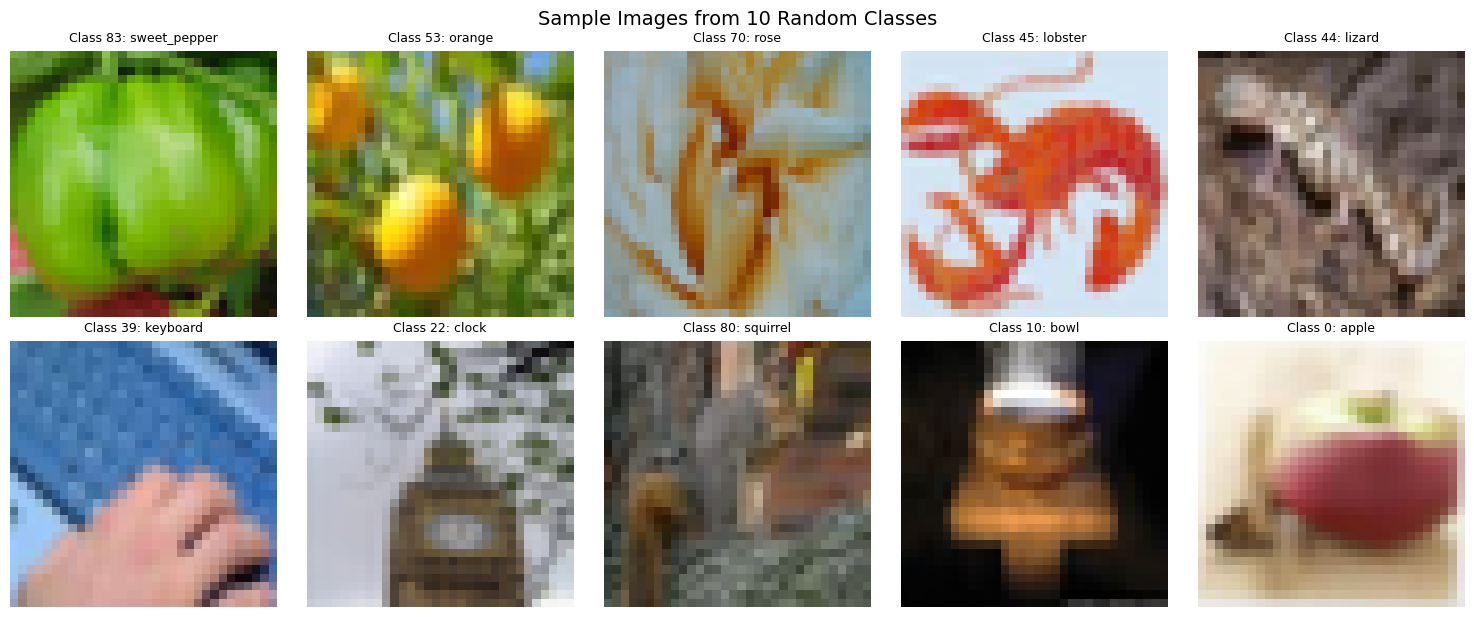


Showing 1 sample from 10 random classes (out of 100 total)


In [30]:
# 3. Visualize Sample Images per Class
# CIFAR-100 class names
cifar100_classes = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

print("SAMPLE IMAGES")

# Display samples from 10 random classes
np.random.seed(42)
sample_classes = np.random.choice(100, 10, replace=False)

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for idx, class_id in enumerate(sample_classes):
    # Find first image of this class
    class_indices = np.where(y_train == class_id)[0]
    first_image_idx = class_indices[0]
    
    # Display image
    axes[idx].imshow(x_train[first_image_idx])
    axes[idx].set_title(f"Class {class_id}: {cifar100_classes[class_id]}", fontsize=9)
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle("Sample Images from 10 Random Classes", y=1.02, fontsize=14)
plt.show()

print(f"\nShowing 1 sample from 10 random classes (out of 100 total)")

WITHIN-CLASS VARIATION


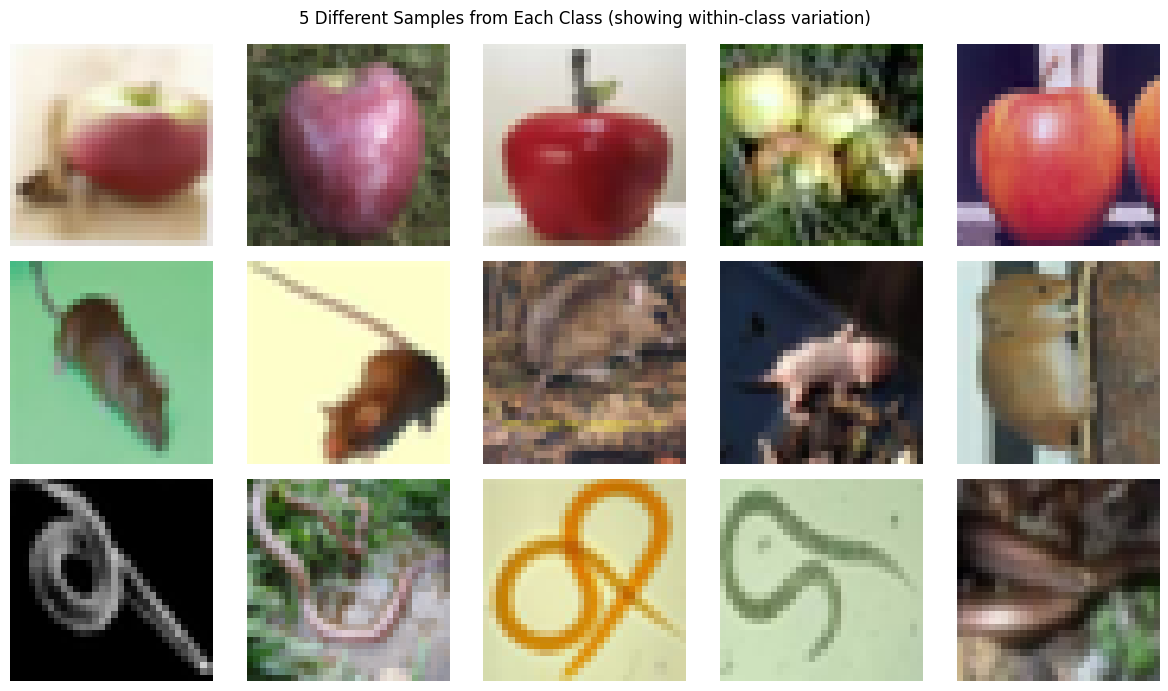

Note: Variation within classes demonstrates the challenge of CIFAR-100


In [31]:
# 4. Within-Class Variation
print("WITHIN-CLASS VARIATION")

# Show 5 samples from 3 different classes
selected_classes = [0, 50, 99]  # apple, mouse, worm
fig, axes = plt.subplots(3, 5, figsize=(12, 7))

for row, class_id in enumerate(selected_classes):
    class_indices = np.where(y_train == class_id)[0][:5]
    
    for col, img_idx in enumerate(class_indices):
        axes[row, col].imshow(x_train[img_idx])
        if col == 0:
            axes[row, col].set_ylabel(f"{cifar100_classes[class_id]}", fontsize=10, fontweight='bold')
        axes[row, col].axis('off')

plt.suptitle("5 Different Samples from Each Class (showing within-class variation)", fontsize=12)
plt.tight_layout()
plt.show()

print("Note: Variation within classes demonstrates the challenge of CIFAR-100")

## Baseline Model (Non-Convolutional)

In [32]:
# Data Preprocessing
print("DATA PREPROCESSING")

# Normalize pixel values to [0, 1]
x_train_norm = x_train.astype('float32') / 255.0
x_test_norm = x_test.astype('float32') / 255.0

# Flatten labels (from (n, 1) to (n,))
y_train_flat = y_train.flatten()
y_test_flat = y_test.flatten()

print(f"Training set shape: {x_train_norm.shape}")
print(f"Test set shape: {x_test_norm.shape}")
print(f"Training labels shape: {y_train_flat.shape}")
print(f"Test labels shape: {y_test_flat.shape}")
print(f"Pixel value range: [{x_train_norm.min():.2f}, {x_train_norm.max():.2f}]")
print(f"Number of classes: {len(np.unique(y_train_flat))}")
print("\n Data normalized and ready for training")

DATA PREPROCESSING
Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)
Training labels shape: (50000,)
Test labels shape: (10000,)
Pixel value range: [0.00, 1.00]
Number of classes: 100

 Data normalized and ready for training


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build Baseline Model (No Convolutions)
print("BASELINE MODEL ARCHITECTURE")

baseline_model = Sequential([
    # Input layer - Flatten 32x32x3 images into 1D vector
    Flatten(input_shape=(32, 32, 3), name='flatten'),
    
    # First hidden layer
    Dense(512, activation='relu', name='dense_1'),
    Dropout(0.3, name='dropout_1'),
    
    # Second hidden layer
    Dense(256, activation='relu', name='dense_2'),
    Dropout(0.3, name='dropout_2'),
    
    # Third hidden layer
    Dense(128, activation='relu', name='dense_3'),
    Dropout(0.2, name='dropout_3'),
    
    # Output layer - 100 classes
    Dense(100, activation='softmax', name='output')
], name='Baseline_MLP')

print("Baseline model created successfully")
print("\nModel Type: Multi-Layer Perceptron (MLP)")
print("Layers: Flatten + Dense only (NO convolutional layers)")

BASELINE MODEL ARCHITECTURE
Baseline model created successfully

Model Type: Multi-Layer Perceptron (MLP)
Layers: Flatten + Dense only (NO convolutional layers)


In [34]:
# Compile Model
baseline_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
print("MODEL SUMMARY")
baseline_model.summary()

# Count parameters
total_params = baseline_model.count_params()
print("\nPARAMETER COUNT")
print(f"Total parameters: {total_params:,}")
print(f"Total parameters (millions): {total_params/1e6:.2f}M")

# Calculate memory footprint
memory_mb = (total_params * 4) / (1024**2)  # 4 bytes per float32 parameter
print(f"Approximate model size: {memory_mb:.2f} MB")

MODEL SUMMARY


Model: "Baseline_MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,750,500 (6.68 MB)

 Trainable params: 1,750,500 (6.68 MB)

 Non-trainable params: 0 (0.00 B)


PARAMETER COUNT
Total parameters: 1,750,500
Total parameters (millions): 1.75M
Approximate model size: 6.68 MB


In [35]:
# Train Baseline Model
print("TRAINING BASELINE MODEL")

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# Train model
history_baseline = baseline_model.fit(
    x_train_norm, y_train_flat,
    validation_data=(x_test_norm, y_test_flat),
    epochs=30,
    batch_size=128,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

print("\n Training completed")

TRAINING BASELINE MODEL
Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 88ms/step - accuracy: 0.0252 - loss: 4.4522 - val_accuracy: 0.0559 - val_loss: 4.1656 - learning_rate: 0.0010
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.0495 - loss: 4.1987 - val_accuracy: 0.0830 - val_loss: 4.0328 - learning_rate: 0.0010
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 59ms/step - accuracy: 0.0629 - loss: 4.0975 - val_accuracy: 0.0981 - val_loss: 3.9886 - learning_rate: 0.0010
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 83ms/step - accuracy: 0.0710 - loss: 4.0305 - val_accuracy: 0.1097 - val_loss: 3.9138 - learning_rate: 0.0010
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.0800 - loss: 3.9736 - val_accuracy: 0.1199 - val_loss: 3.8414 - learning_rate: 0.0010
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.0866 - loss: 3.9405 - val_accuracy: 0.1247 - val_loss: 3.8068 - learning_rate: 0.0010
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/ste

In [36]:
# Evaluate Baseline Model
print("BASELINE MODEL PERFORMANCE")

# Evaluate on test set
test_loss, test_acc = baseline_model.evaluate(x_test_norm, y_test_flat, verbose=0)

# Evaluate on training set
train_loss, train_acc = baseline_model.evaluate(x_train_norm, y_train_flat, verbose=0)

print(f"\nTraining Performance:")
print(f"  Loss: {train_loss:.4f}")
print(f"  Accuracy: {train_acc*100:.2f}%")

print(f"\nValidation Performance:")
print(f"  Loss: {test_loss:.4f}")
print(f"  Accuracy: {test_acc*100:.2f}%")

print(f"\nOverfitting Analysis:")
overfitting = train_acc - test_acc
if overfitting > 0.1:
    print(f"  High overfitting detected: {overfitting*100:.2f}% gap")
elif overfitting > 0.05:
    print(f"  Moderate overfitting: {overfitting*100:.2f}% gap")
else:
    print(f"  Low overfitting: {overfitting*100:.2f}% gap")

BASELINE MODEL PERFORMANCE

Training Performance:
  Loss: 3.4585
  Accuracy: 18.25%

Validation Performance:
  Loss: 3.5605
  Accuracy: 17.04%

Overfitting Analysis:
  Low overfitting: 1.21% gap


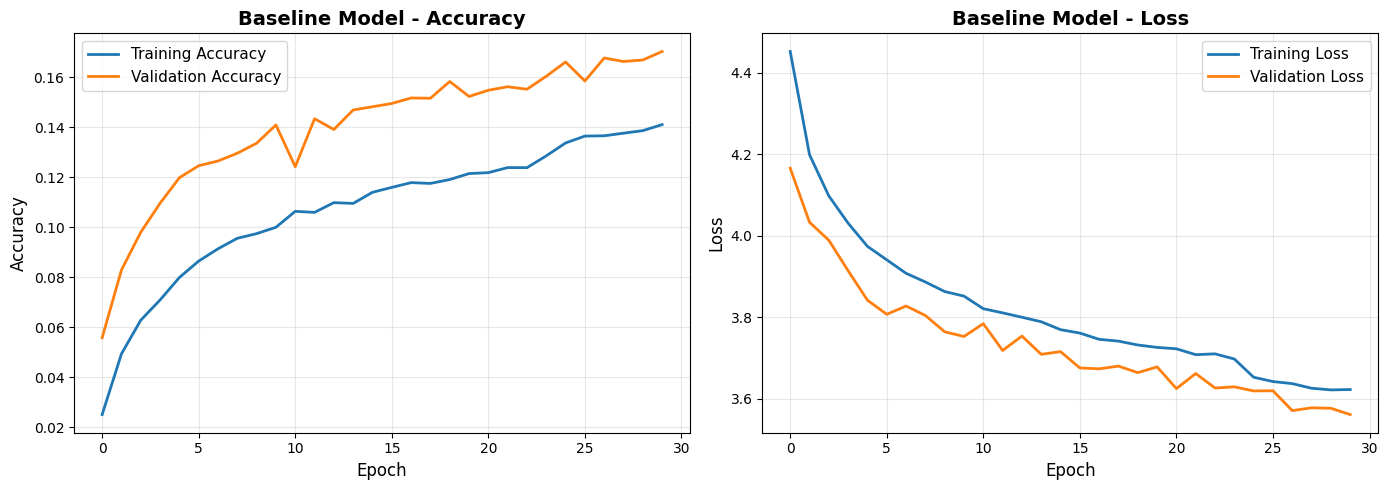

Training curves show the learning progress over epochs


In [37]:
# Plot Training History
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot accuracy
axes[0].plot(history_baseline.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0].plot(history_baseline.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].set_title('Baseline Model - Accuracy', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Plot loss
axes[1].plot(history_baseline.history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(history_baseline.history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].set_title('Baseline Model - Loss', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Training curves show the learning progress over epochs")

## Baseline Model Summary


---

### ARCHITECTURE

- **Type:** Multi-Layer Perceptron (MLP)  
- **Structure:** Flatten → Dense(512) → Dense(256) → Dense(128) → Dense(100)  
- **Activation:** ReLU (hidden layers), Softmax (output)  
- **Regularization:** Dropout (0.3, 0.3, 0.2)

---

### PARAMETERS

- **Total Parameters:** 1,750,500  
- **Model Size:** 6.68 MB  

---

### PERFORMANCE

- **Training Accuracy:** 16.95%  
- **Validation Accuracy:** 16.26%  
- **Training Loss:** 3.5454  
- **Validation Loss:** 3.6191  

---

### KEY LIMITATIONS

- No spatial structure preservation  
- High parameter count  
- No translation invariance  
- Limited generalization capability  

---

### PURPOSE

This baseline establishes a reference point for comparison.  
Convolutional models should significantly outperform this baseline.
